In [116]:
# This is a formatting cell and not related to the analysis or reported results
# It contains code which changes the style and layout of this Notebook and handles some useful imports
# This is done by importing the IPython display HTML extension 
# and updating the HTML of the page with some style specifications
# For this, python code, CSS and HTML were used

from IPython.display import HTML
HTML('''
<style> 
    body {
        font-family: "Spartan";
    }
    
    h1 {
        padding: 25px 10px;
        background-color: #CC3C14;
        position: static;
        color: #ffffff;
        font-size: 40px !important;
        text-align: center;
    }
    
    h2 {
        padding: 10px 5px;
        background-color: #E94C20;
        position: static;
        color: #ffffff;
        font-size: 25px !important;
        text-align: center;
    }
    
    h3 {
        padding: 5px 10px;
        background-color: #ED6A45;
        position: static;
        color: #ffffff;
        font-size: 30px;
        width: 75%;
    }
</style>
''')

### Author(s): Andrey Govorukhin ###
### Cell: 18/10/2023 - 21/10/2023 ###

# Assignment 2 - Product Notebook

Notebook Authors: 
 - Andrey Govorukhin
 - Jacky Chan
 - Jialu Xu
 - Shaun Lim
 - Ke Lyu
 - Mengyuan Zhang

Group: CC01-3

## Introduction

The purpose of this report is to provide a detailed yet concise presentation of the process, results and conclusions reached from the analysis of the FitBit step data, and more importantly to attempt to answer the posed driving problem.

<b>Driving Problem: "How well do these people meet the recommendation of at least 150 minutes of moderate activity per week?"</b>

The report consists of 3 main parts: Data Analysis - the section where the data is presented, described, analysed and results are explained; Conclusions - where the outcomes of those results are stated and discussed; and Limitations - where any limiting factors and issues are explored and their effects on this report or the analysis are examined.

### Assumptions and Predictions

Before proceeding to load and analyse the data we will state some assumptions and predictions we had.

Firstly, there are some difficulties involved in selecting the value which would be constitute the amount of steps per minute a person has to take in order for their activity to be considered 'moderate'. When deciding on this value we had two options: Choose an amount of steps which will be the same for everyone and base that value off of prior research in the field of health and fitness, or to analyse each person's individual step counts and take some percentage of their maximum or just the average counts. However, when we performed such analyses, we discovered that for the people which were more active during the observation period tended to have a similar amount of steps as their moderate activity, while the participants with less overall activity had a much smaller step count for moderate activity, and, when basing our anlysis on those smaller values, it turned out that a very large portion of the participants met the recommendation. In the end, we settled on a well known value of <b>100</b> steps per minute, which would be the same for everyone.

The second assumption we made was in regards to the value of 0. The value of 0 in the dataset was assumed to be no movement, any non values were replaced with 0. 

Lastly, the independance and randomness assumptions. We assumed that all participants step counts are unaffected by the others. Additionally, we assumed that the data we got was collected using random sampling to ensure the population is represented fairly.

In terms of predictions, we had one, which was that the population of individuals from the dataset does not meet the recommendation (100 steps/min) of at least 150 minutes of moderate activity per week on average and for the latter weeks in particular.

## Data Loading and Preparation

Before loading the data or beginning the analysis, we must import some useful libraries, which we will need for additional functionality, not provided by vanilla python.

The Libraries and modules used in this report are:
 - pandas: for dataset control and management, including storing dataframes in memory and performing various operations on the data
 - matplotlib: for plotting visual figures
 - seaborn: for various plotting customization options
 - scipy: for statistical analysis and hypothesis testing
 - numpy: for extra necessary dataframe interactions / management options

In [100]:
#Importing necessary python libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats

### Author(s): Andrey Govorukhin ###
### Cell: 18/10/2023 - 21/10/2023 ###

### Raw Data

The data used in the analysis is the individual participants' steps for each minute for each hour of the observation period. The full dataset and any information on it can be accessed through this [link](https://www.kaggle.com/datasets/arashnic/fitbit), while just the raw data itself we used in the analysis can be obtained [here](https://www.dropbox.com/scl/fi/fomxlcxs07c75u7ihvk4y/minuteStepsWide_merged.csv?rlkey=ljvfjqpthjfy0s103p9hvm286&dl=0).

We will first have to load this data for further preparation and analysis with the following operations:

In [101]:
# This command uses the read_csv function in pandas to load and save in memory our dataset
minute_steps = pd.read_csv('./Data/minuteStepsWide_merged.csv')

# Observing the raw data by printing it onto the screen
minute_steps

### Author(s): Andrey Govorukhin ###
### Cell: 18/10/2023 - 21/10/2023 ###

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,8877689391,5/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21641,8877689391,5/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21642,8877689391,5/13/2016 5:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21643,8877689391,5/13/2016 6:00:00 AM,0,0,0,0,0,0,0,0,...,21,22,33,17,24,0,0,20,38,16


This dataset is quite large and some rows need to be hidden in order to preserve vertical space, however, it is clear from the snapshot, that, in total, the dataset above contains 21645 entries (rows) and 62 fields (columns). Furthermore, the data describes step counts of 32 different observed participants.

### Data Preparation

To be able to perform meaningful analysis of the data, it is imperative that it is first prepared, which could mean many different operations performed on the data, however, in this case, it only means that we have to perform type conversion and cleaning on some of the columns in the dataset.

#### 1) Converting ActivityHour to DateTime

First we will convert the Activity Time column from string values to datetime values. This is needed because the tools we will be using for our analysis require the timeseries data to be a datetime object rather than string.

To perform the conversion, we use the pandas in-built to_datetime function, specifying the format of the date in its string form and the column we would like to convert the data in.

In [102]:
# Converting the ActivityHour to date time object
# and providing a format template to let the converter know what the string looks like
# The converted data will be placed in a new column to preserve the old data
minute_steps['ActivityHourTime'] = pd.to_datetime(minute_steps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

### Authors: Andrey Govorukhin ### 
### Cell TimeFrame: 20/10/2023 - 20/10/2023 ###

After the conversion we have created a new column ActivityHourTime which contains the date and hour values in the correct datetime format.

In [103]:
# Creating a new column by extracting the 'Day' from 'ActivityHourTime' column
minute_steps['ActivityDay'] = minute_steps['ActivityHourTime'].dt.date

### Author(s): Andrey Govorukhin ###
### Cell Timeframe: 18/10/2023 - 21/10/2023 ###

#### 2) Renaming and Reordering Columns

To improve the layout, readability and usability of the dataframe, we will rename some of its columns, to reflect the data they contain.

In [104]:
# Renaming the old column to ActivityHourString
minute_steps.rename(columns={'ActivityHour': 'ActivityHourString'}, inplace=True)

# Reordering the columns for better layout
minute_steps.insert(1, 'ActivityDay', minute_steps.pop('ActivityDay'))
minute_steps.insert(2, 'ActivityHourTime', minute_steps.pop('ActivityHourTime'))

### Authors: Andrey Govorukhin ### 
### Cell TimeFrame: 20/10/2023 - 20/10/2023 ###

Now the column which was previously called 'ActivityTime' and contained the time as strings will be called ActivityHourString, while the new column that was added after conversion will be moved to the front of the dataframe.

In [105]:
# Displaying the modified dataframe
minute_steps

### Author(s): Andrey Govorukhin ###
### Cell Timeframe: 18/10/2023 - 21/10/2023 ###

,Id,ActivityDay,ActivityHourTime,ActivityHourString,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,2016-04-13,2016-04-13 00:00:00,4/13/2016 12:00:00 AM,4,16,0,0,0,9,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,2016-04-13,2016-04-13 01:00:00,4/13/2016 1:00:00 AM,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,2016-04-13,2016-04-13 02:00:00,4/13/2016 2:00:00 AM,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,2016-04-13,2016-04-13 03:00:00,4/13/2016 3:00:00 AM,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,2016-04-13,2016-04-13 04:00:00,4/13/2016 4:00:00 AM,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,8877689391,2016-05-13,2016-05-13 03:00:00,5/13/2016 3:00:00 AM,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21641,8877689391,2016-05-13,2016-05-13 04:00:00,5/13/2016 4:00:00 AM,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21642,8877689391,2016-05-13,2016-05-13 05:00:00,5/13/2016 5:00:00 AM,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21643,8877689391,2016-05-13,2016-05-13 06:00:00,5/13/2016 6:00:00 AM,0,0,0,0,0,0,...,21,22,33,17,24,0,0,20,38,16


#### 3) Binning the Data into Distinct Weeks

Currently, the data we have comes in distinct hours for each day of the observation period, however, because our goal is to analyse how the participants meet the weekly recommendations it would help if the dataset entries were divided into easily distinguishable weeks.

It does not matter for us what day the weeks start on because our goal is to examine weekly adherence to recommendation in general, hence we will assume that week 1 starts from the first day of the observation period (which also happens to be Wednesday).

In [106]:
# Calculate the difference in weeks from the minimum date in 'ActivityHourTime'
# and create a new column with the week numbers
minute_steps['WeekNumber'] = ((minute_steps['ActivityHourTime'] - minute_steps['ActivityHourTime'].min()).dt.days // 7) + 1

# Exclude rows where WeekNumber is 5
minute_steps = minute_steps[minute_steps['WeekNumber'] != 5]

# Change the order of the columns by inserting WeekNumber column into 4th position
minute_steps.insert(3, 'WeekNumber', minute_steps.pop('WeekNumber'))

### Authors: Shaun Lim, Andrey Govorukhin ###
### Cell Timeframe: 22/10/2023 - 26/10/2023 ###

Now the data is binned into 4 weeks of the observational period. Though there are 31 days in total, we have decided to remove the 5th week, as it only contained 3 days in it, and the data from this week will not be sufficient to answer the driving problem.

#### 4) Creating Additional Dataframes

In order to streamline and simplify the process of analysing the trends in the dataset both visually and statistically, we can create a number of 'helper' dataframes with the aggregated minute step counts data.

The first of such dataframes will be the participants' total amount of minutes with moderate activity for each week. To create it, we will simply count the minutes for each participant in which they have made at least 100 steps (which is our chosen measure for the moderate activity) and sum up those minute counts for every week in which that participant has been observed. This dataframe will be used when plotting or conducting tests on total minutes to weeks for individual participants or the whole sample.

In [107]:
# Copying the prepared dataframe in order to preserve its current state
# The rest of this particular analyis will be done using the clone dataframe
reordered_minute_copy = minute_steps.copy()

# Generate step column names
all_step_columns = ['Steps{:02}'.format(i) for i in range(60)]

# Filter the DataFrame to consider only step columns and check if the steps are >= 100
over_100_steps = reordered_minute_copy[all_step_columns] >= 100

# Count how many of the step columns have values >= 100 for each row
reordered_minute_copy['Over_100_Count'] = over_100_steps.sum(axis=1)

# Group by 'Id' and 'Activity Week' and sum the counts
weekly_over_100_counts_by_id = reordered_minute_copy.groupby(['Id', 'WeekNumber'])['Over_100_Count'].sum()

# Convert the table to a dataframe
weekly_over_100_counts_by_id_visual = weekly_over_100_counts_by_id.unstack(level='WeekNumber')
df_week = pd.DataFrame(weekly_over_100_counts_by_id_visual)

# Replace NaN values with 0
df_week.fillna(0, inplace=True)

# Displaying first 5 entries in the new dataframe using head()
df_week.head()

### Author(s): Shaun Lim ###
### Cell Timeframe: 18/10/2023 - 21/10/2023 ###

WeekNumber,1,2,3,4
Id,,,,
1503960366,316.0,349.0,389.0,287.0
1624580081,106.0,31.0,267.0,4.0
1644430081,140.0,47.0,37.0,117.0
1844505072,4.0,2.0,5.0,0.0
1927972279,0.0,0.0,34.0,0.0


The dataframe above is showing the total amount of minutes of moderate activity in each week of the observation period for every participant (Id).

The other new dataframe will be very similar to the previous one, but will have total amount of minutes with moderate activity per day rather than per week. Such dataframe can be used to plot the total moderate activity minutes to days relation.

In [108]:
# Create a helper list of minute columns strings for iterating over them in the next steps 
all_step_columns = ['Steps{:02}'.format(i) for i in range(60)]

# Filter the DataFrame to consider only step columns and check if the steps are >= 100
over_100_steps = reordered_minute_copy[all_step_columns] >= 100

# Count how many of the step columns have values >= 100 for each row
reordered_minute_copy['Over_100_Count'] = over_100_steps.sum(axis=1)

# Group by 'Id' and 'Day' and sum the counts
daily_over_100_counts_by_id = reordered_minute_copy.groupby(['Id', 'ActivityDay'])['Over_100_Count'].sum()

# Sort the dataframe by days 
daily_over_100_counts_by_id_visual = daily_over_100_counts_by_id.unstack(level='ActivityDay')
df_day = pd.DataFrame(daily_over_100_counts_by_id_visual)

# Replace NaN values with 0
df_day.fillna(0, inplace=True)

# Display first 5 entries in the new df using head() function
df_day.head()

### Author(s): Shaun Lim ###
### Cell Timeframe: 18/10/2023 - 29/10/2023 ###

ActivityDay,2016-04-13,2016-04-14,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,...,2016-05-01,2016-05-02,2016-05-03,2016-05-04,2016-05-05,2016-05-06,2016-05-07,2016-05-08,2016-05-09,2016-05-10
Id,,,,,,,,,,,,,,,,,,,,,
1503960366,39.0,50.0,27.0,52.0,37.0,54.0,57.0,33.0,37.0,68.0,...,16.0,60.0,62.0,38.0,51.0,40.0,22.0,40.0,49.0,47.0
1624580081,6.0,36.0,0.0,0.0,29.0,34.0,1.0,2.0,1.0,0.0,...,201.0,13.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
1644430081,22.0,6.0,12.0,55.0,31.0,7.0,7.0,2.0,1.0,9.0,...,6.0,4.0,8.0,5.0,11.0,17.0,44.0,3.0,27.0,10.0
1844505072,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1927972279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,13.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The above dataframe much like the previous one contains total amount of minutes of moderate activity, but in each day of the observation period for every participant.

Having performed the preparation steps, we are now ready to start analysing the data.

## Data Analysis

### Visualising Participants' Adherence to The Recommendation

We begin the analysis by visualizing the participants' minute step count data and using various visual tools and techniques to examine how well they met the 150 minutes recommendation.

#### 1) Line Graph of Minutes with Moderate Activity each Week 

Firstly, we will plot a simple line graph to see how some of the participants progressed individually over the observation period, and whether they met the recommendation.

To do this, we will select 10 random observed participants from the dataset and plot their amounts of moderate activity minutes for each week. The line graph will then let us know how that amount changed over the course of the observation period.

##### Visualization Setup Process:
1. **Aesthetics & Style**: 
Using Seaborn's "whitegrid" theme, we create a visually clear backdrop.

2. **Data Preparation**: 
The dataset is transformed from its wide format to a 'long' format, simplifying the representation of `Id`, `Week`, and `Steps`.

3. **Random Selection**: 
10 unique participant IDs are randomly picked, filtering our dataset to focus solely on these individuals.

4. **Canvas Setup**: 
A 15x10 canvas with a soft gray background is prepared for plotting.

5. **Color Differentiation**: 
Using the "husl" palette, each of the 10 participants is assigned a distinct color.

6. **Plotting**: 
A line plot showcases each participant's weekly steps, with individual weeks on the x-axis and step counts on the y-axis.

7. **Benchmarking**: 
A red dashed line at the 150 steps mark serves as a performance benchmark.

8. **Annotations**: 
With a descriptive title, axis labels, and a participant legend, the plot is made easily interpretable.

9. **Display**: 
The final visual is displayed, highlighting step count trends for the selected participants.

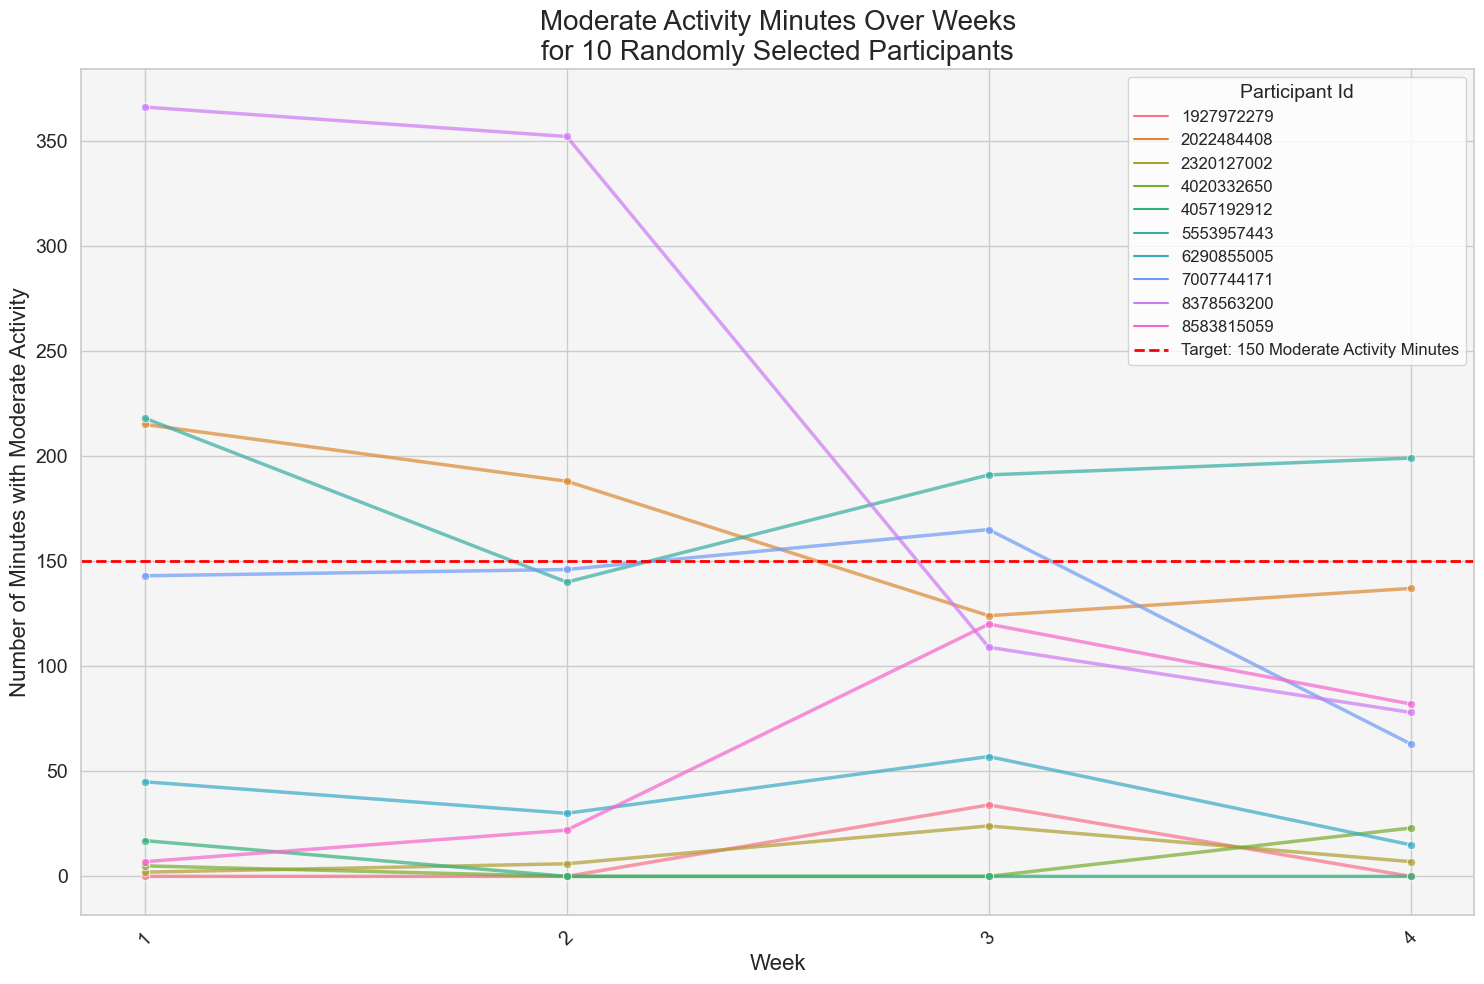

In [109]:
# 1) Set up the seaborn style and plot
sns.set_theme(style="whitegrid")

# 2) Melt dataframe to long format suitable for seaborn
df_melted = df_week.reset_index().melt(id_vars="Id", var_name="Week", value_name="Steps")

# 3) Select only 10 arbitrary participants
selected_ids = np.random.choice(df_melted["Id"].unique(), 10, replace=False)
df_melted = df_melted[df_melted["Id"].isin(selected_ids)]

# 4) Setting the figure size and background
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor("#f5f5f5")

# 5) Use a color palette that can handle the number of selected IDs
palette = sns.color_palette("husl", len(selected_ids))

# 6) Plot the line graph with a larger size and increased line transparency
sns.lineplot(data=df_melted, x="Week", y="Steps", hue="Id", palette=palette, marker="o", lw=2.5, alpha=0.7)

# 7) Add a horizontal target line
plt.axhline(150, color='red', linestyle='--', linewidth=2, label='Target: 150 Moderate Activity Minutes')

# 8) Add title, labels, and legend
plt.title("Moderate Activity Minutes Over Weeks\nfor 10 Randomly Selected Participants", fontsize=20)
plt.ylabel("Number of Minutes with Moderate Activity", fontsize=16)
plt.xlabel("Week", fontsize=16)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels
plt.yticks(fontsize=14)

# Set x-ticks to only whole numbers
ax.set_xticks(np.arange(1, df_melted['Week'].max() + 1))
ax.set_xticklabels(np.arange(1, df_melted['Week'].max() + 1).astype(int))

# Legend setup
ax.legend(title="Participant Id", fontsize=12, title_fontsize=14)

# 9) Displaying the finalized figure
plt.tight_layout()
plt.show()

### GAI was used to research visual enhancement methods for the graph
### Author(s): Shaun Lim ###
### Cell Timeframe: 18/10/2023 - 30/10/2023 ###

**Result Intepretation** <br>
The line graph displays the weekly activity trends of 10 randomly selected participants. Each participant's performance can be compared against the target line set at 150 moderate activity minutes per week.

For the participants that are displayed on the graph it is clear that most of them do not in fact meet the recommendation for most of the weeks, with the first week having 3 of the 10 people meeting the recommendation, the second and third both having 2 different perople meeting the goal of 150 minutes, while the fourth week had only 1 participant who met the recommendation.

#### 2) HeatMap of Participants' Steps per Day

Next, we can attempt to look at the data from a slighlty different perspective, and instead of analysing weekly minutes of moderate activity, we can look at the daily minutes and attempt to answer the driving problem using that data.

To do this we will create a heatmap that showcases the extent to which daily step goals (150 minutes per week, hence 22 minutes per day) are achieved by users. Different color shades represent varying levels of goal achievement, making it easy to visually gauge performance trends over time.

##### Visualization Setup Process:
1. **Setting Up the Color Map:**
A "colorblind" color palette is chosen to represent the different levels of goal achievement to address colorblindness. This palette is designed to have five distinct shades of dark orange, with each shade corresponding to a specific goal achievement bracket.

2. **Defining Breakpoints for Goal Achievement:**
To categorize the achievement levels, we set specific breakpoints of 5, 11, 16 and 22.

3. **Creating a Mask for Coloring:**
A function is defined to evaluate where each data point in our dataset falls with respect to the breakpoints. The function assigns a number (from 0 to 3) based on the bracket in which the data point belongs. This 'masked' dataset, with values ranging from 0 to 3, will be used to determine the color of each cell in the heatmap.

4. **Plot Configuration:**
A canvas for the heatmap is initialized with a size of 17x7 units, providing ample space for data representation and legibility.

5. **Constructing the Heatmap:**
Seaborn's heatmap function is employed to render the visualization. The masked dataset dictates the color of each cell, while the original dataset provides numeric annotations inside the cells. In the final figure however only some annotations are kept, as too many shown values would clutter the screen. Lines are added to segment the data into weeks and differentiate users.

6. **Enhancing the Visual:**
Titles, labels, and axis adjustments ensure the plot is informative and user-friendly. The x-axis ticks, representing dates, are rotated for clarity. Feint white lines demarcate weekly boundaries, aiding in easier data interpretation, they do not stand out, but rather act as a natural visual separator in order to not hinder user's perception of the map.

7. **Crafting the Legend:**
A legend on the right side of the heatmap provides context to the colors. Each shade of purple is associated with a label explaining the goal achievement level it represents. The legend frame is given a soft gray background with a black border, ensuring it stands out yet remains aesthetically pleasing.

8. **Displaying the Visual:**
Upon finalizing all configurations, the heatmap is rendered. The outcome is a vivid representation of daily step goals achievement, where color gradients instantly convey how well the goal was met on a particular day for a specific user.

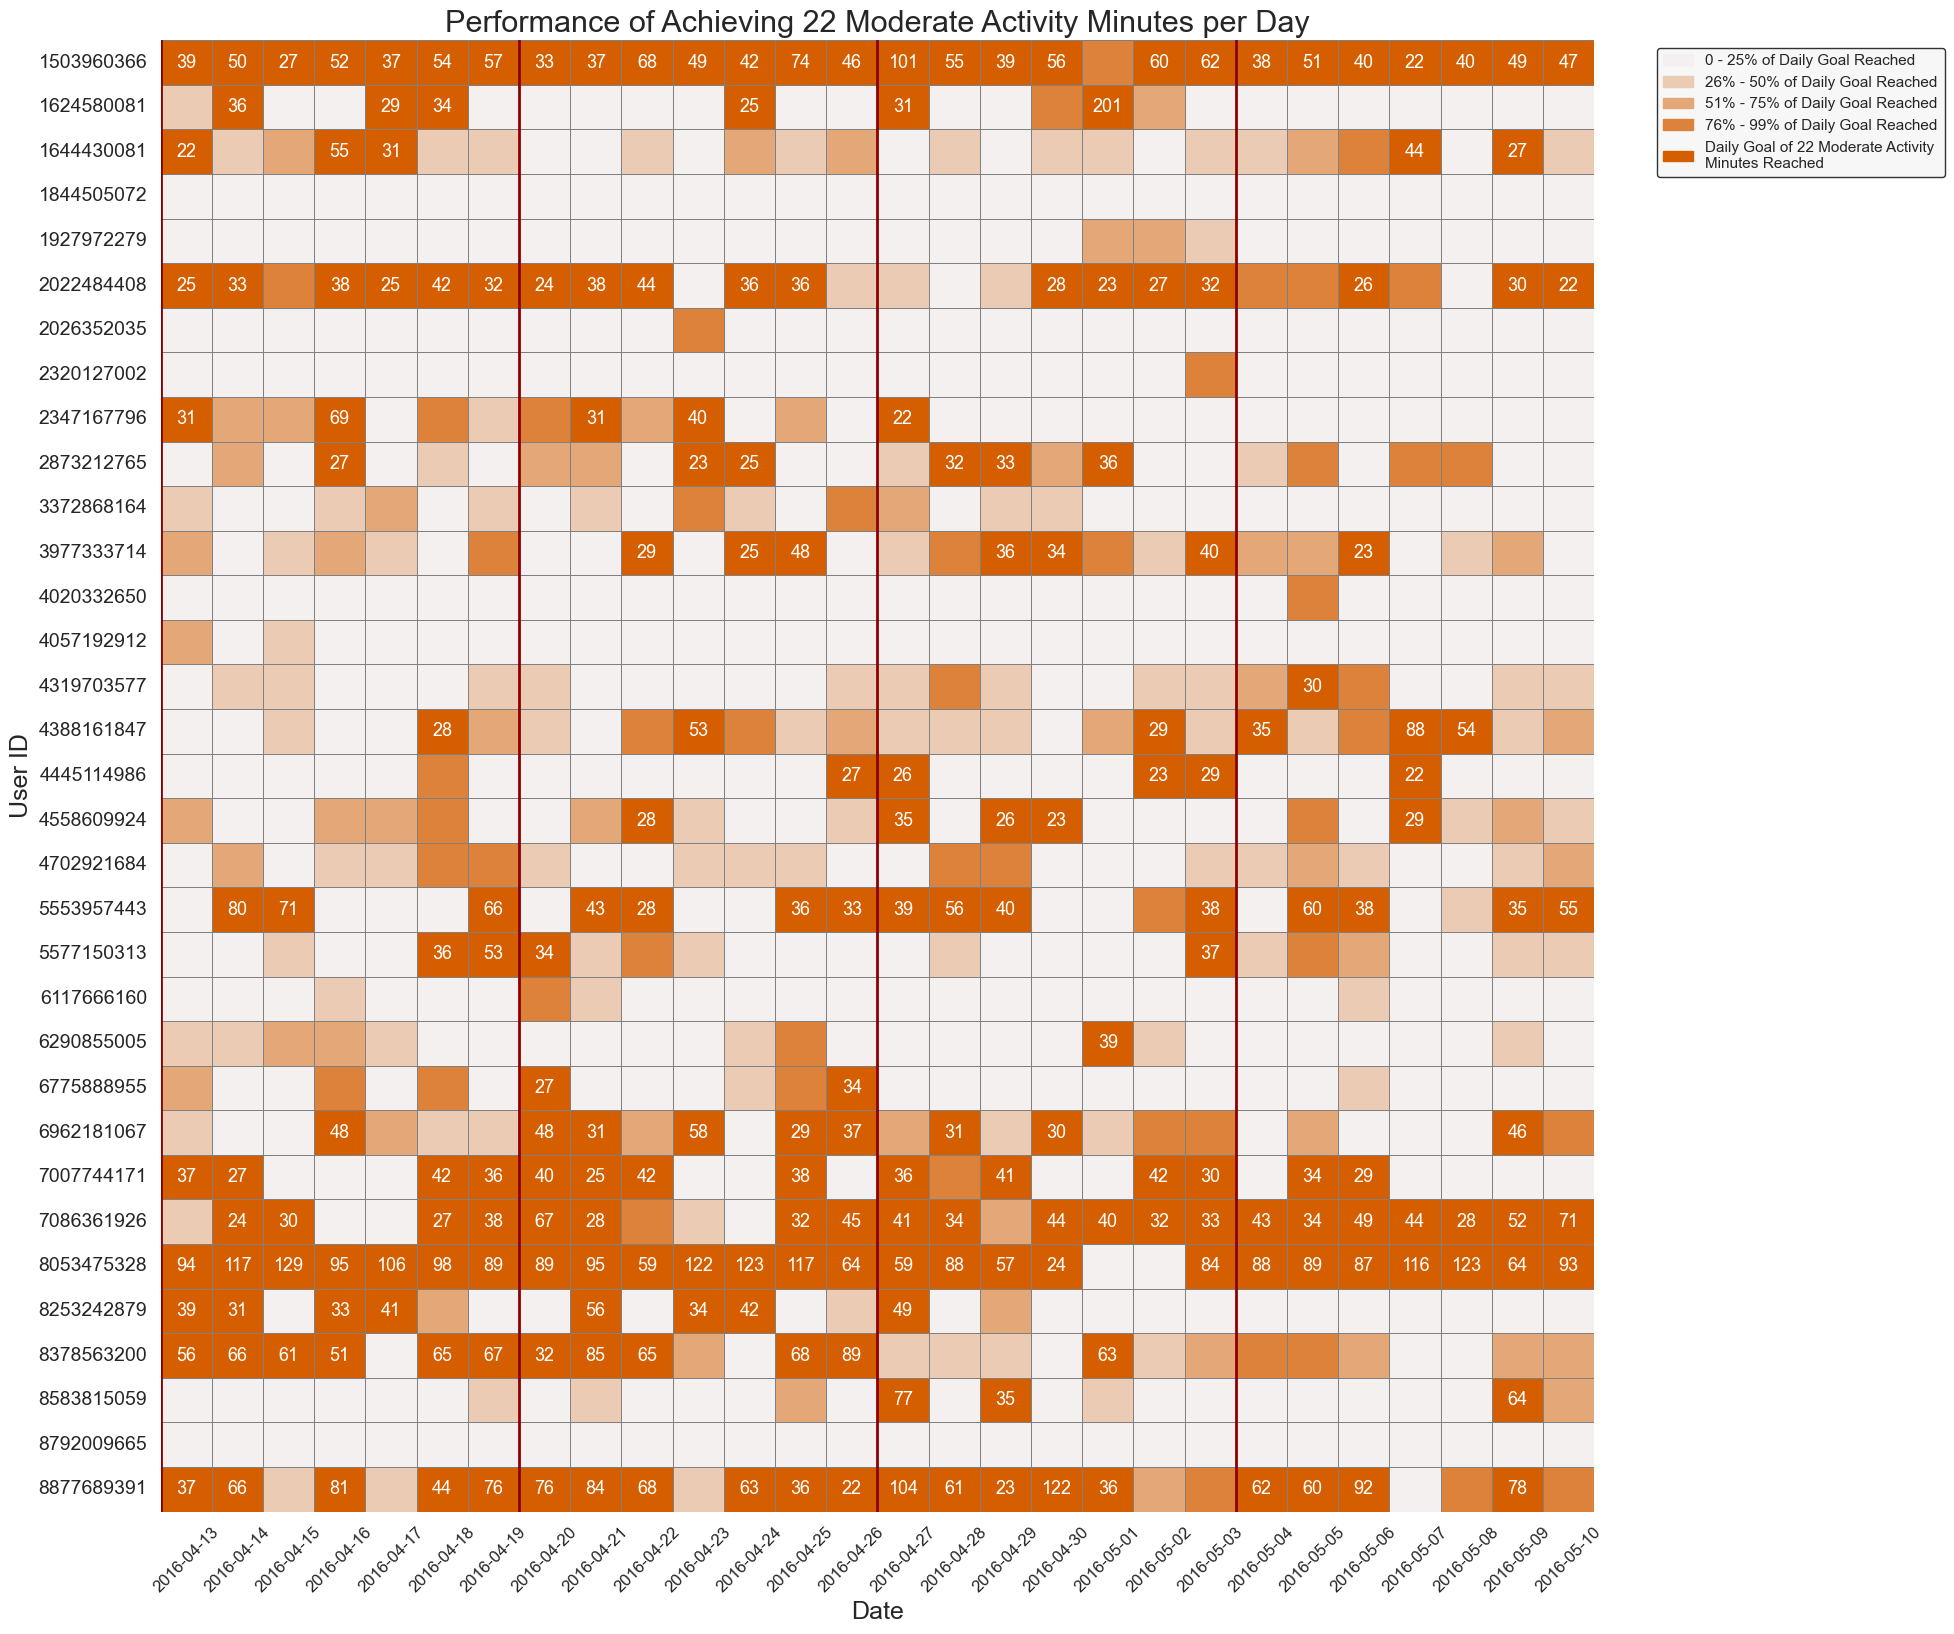

In [110]:
# 1) Get the primary color from the "colorblind" palette
primary_color = sns.color_palette("colorblind")[3]

# Generate a light palette with varying shades of the primary color
cmap_varying_shades = sns.light_palette(primary_color, n_colors=5)

# 2) Define breakpoints based on the new categories
breakpoints = [5, 11, 16, 22]

# 3) Generate a mask for custom coloring based on the breakpoints
def mask_values(val):
    if val >= breakpoints[3]:
        return 4
    elif val >= breakpoints[2]:
        return 3
    elif val >= breakpoints[1]:
        return 2
    elif val >= breakpoints[0]:
        return 1
    else:
        return 0

masked_values = df_day.applymap(mask_values)

# 4) Set up the figure
plt.figure(figsize=(20, max(8, 0.5 * df_day.shape[0])))

# 5) Plot heatmap with partial annotation for clarity
annot_values = df_day.copy()
annot_values = annot_values.applymap(lambda x: f'{x:g}' if x >= breakpoints[3] else '')
ax = sns.heatmap(masked_values, cmap=cmap_varying_shades, cbar=False, linewidths=0.5, linecolor='gray',\
                 annot=annot_values, annot_kws={"fontsize":13}, fmt='s')

# 6) Draw vertical lines every 7 days to segment the weeks
for x in range(0, df_day.shape[1], 7):
    ax.axvline(x=x, color='#8B0000', lw=2)

# Set title and labels
plt.title("Performance of Achieving 22 Moderate Activity Minutes per Day", fontsize=22)
plt.ylabel('User ID', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=14)

# 7) Create legend
labels = ["0 - 25% of Daily Goal Reached", "26% - 50% of Daily Goal Reached", "51% - 75% of Daily Goal Reached", \
          "76% - 99% of Daily Goal Reached", "Daily Goal of 22 Moderate Activity \nMinutes Reached"]
colors = cmap_varying_shades
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
legend = plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.25, 1))
frame = legend.get_frame()
frame.set_edgecolor('black')
frame.set_facecolor('#f5f5f5')

# 8) Tight layout for better appearance
plt.tight_layout()
plt.show()

### GAI was used to research visual enhancements methods for the heatmap
### Author(s): Shaun Lim, Andrey Govorukhin ###
### Cell Timeframe: 18/10/2023 - 30/10/2023 ###

**Result Interpretation** <br>
The heatmap provides a visualization of activity levels across all participants, using a gradient of five shades of a single color. Lighter shades indicate lower performance levels, while darker shades represent higher performance. The data is organized by days, with a dark red line appearing every 7 days to seperate the weeks. The days where participants reached 100% of the daily goal also display their amount of minutes with moderate activity for that day, in order for the observer to be able to interpret these results.

It is clear that across the board there is quite a lot of darker squares which indicate the completion of the daily goal, while there are almost equally as many lighter ones in which the participants either made 75% or slighlty more progress towards the goal or no progress at all.

Overall, the heatmap gives us a good overview of the participants' daily minutes of moderate activity throughout the four observed weeks, and from these results we can even attempt to answer the driving problem. As for instance, the top most participant clearly met the daily goal for all the days of the observed period except 1, hence we can say with certainity that they have met the weekly recommendation of 150 minutes of moderate activity in all 4 weeks. The same thought process can be used for the other participants to analyse their activity and see whether they met the recommendation or not.

#### 3) Visualizing Weekly Recommendation Meeting Trend of the Full Sample

For the last step in the visual analysis, we will look at the distributions of participants' total minutes of moderate activity for each week. This will allow us to notice any potential trends in the data, which we can use to answer the driving problem.

As the primary objective is to understand the distribution of steps taken over different weeks we can use a number of boxplots to visualize this with each week having a separate box. 

Given the data's potential skewness, we'll apply a logarithmic transformation to make it more interpretable. Moreover, we want to benchmark these steps against a target, which in this case is set at 150 steps.

From the previous plots we have seen a slight downward trend in the amount of minutes of moderate activity per week during the latter weeks (3 and 4) in all the participants, hence we assume that the same will be visible in the distributions as well.

##### Visualization Setup Process:
1. **Setting Up The Visualization Style:**
The "whitegrid" style is selected to establish the foundational look of our plot. 

2. **Data Transformation for Visualization:**
The transformed dataset features three columns: "Id," "Week," and the "Steps" for the respective week. Furthermore, a logarithmic transformation is applied to the "Steps" column to reduce variance. To avoid math error, a value of 1 is added before the logarithm is computed.

3. **Sketching the Boxplot:**
The box plot is created, assigning weeks to the horizontal axis and the log-transformed step counts to the vertical axis. The choice of color palette, "husl," ensures a vibrant and clear distinction between data points.

4. **Highlighting the Goal / Benchmark:**
To provide a visual frame of reference, a horizontal dashed line is introduced. This line visually signifies the log-transformed value of a step count of 150, serving as a benchmark of step counts required to reach the goal presented by our driving question. Since all step counts are logged, the target must be logged as well to ensure consistency.

5. **Integrating the Legend:**
A legend indicating the meaning of the red benchmark line, providing viewers with an immediate context to interpret the visual data. <br><br>

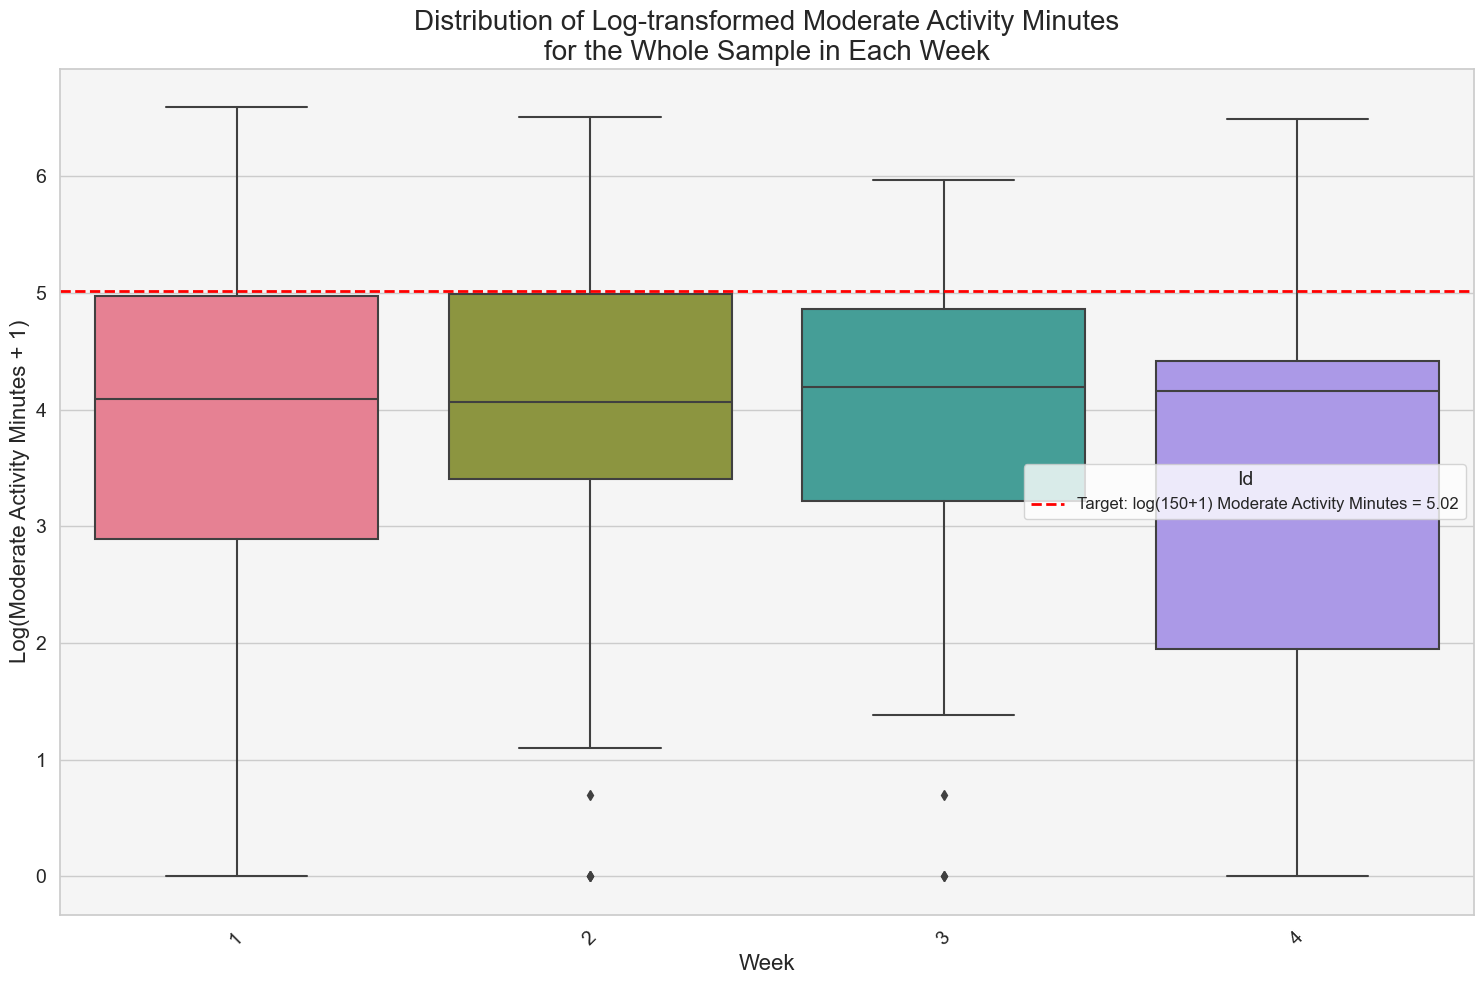

In [117]:
# 1) Set up the seaborn style and plot
sns.set_theme(style="whitegrid")

# 2) Melt dataframe to long format suitable for seaborn
df_melted = df_week.reset_index().melt(id_vars="Id", var_name="Week", value_name="Steps")

# Apply the logarithmic transformation
df_melted["LogSteps"] = np.log(df_melted["Steps"] + 1)

# 3) Setting the figure size and background
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor("#f5f5f5")

# Create the boxplot using the transformed data
sns.boxplot(data=df_melted, x="Week", y="LogSteps", ax=ax, palette="husl")

# 4) Add a horizontal target line for the transformed target
log_target = np.log(150 + 1)
plt.axhline(log_target, color='red', linestyle='--', linewidth=2, \
            label=f'Target: log(150+1) Moderate Activity Minutes = {log_target:.2f}')

# 5) Add title, labels, and legend
plt.title("Distribution of Log-transformed Moderate Activity Minutes\nfor the Whole Sample in Each Week", fontsize=20)
plt.ylabel("Log(Moderate Activity Minutes + 1)", fontsize=16)
plt.xlabel("Week", fontsize=16)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels
plt.yticks(fontsize=14)
plt.legend(title="Id", fontsize=12, title_fontsize=14)

# Displaying the final figure by showing the accumulated changes to the initial boxplot
plt.tight_layout()
plt.show()

### GAI was used to research visual enhancements methods for the plot
### Author(s): Shaun Lim ###
### Cell Timeframe: 18/10/2023 - 30/10/2023 ###

**Result Interpretation** <br>
The boxplot's whiskers highlights the data spread outside the central 50%. Longer whiskers signify more variance. Notably, weeks 1 and 4 display the longest whiskers, indicating the highest variance. Weeks 2 and 3 each have two outliers, suggesting a significant spread among a few data points.

The box itself highlights the spread within the middle 50% of the data. A larger box shows a wide spread for the central data, while a narrow one implies a tighter cluster. In our findings, weeks 1 and 4 have broader boxes, indicating higher variance within the central data, whereas weeks 2 and 3 show more compact central data.

The box's internal line represents the median, revealing data distribution and skewness within the IQR. A centered median suggests symmetry; a median near Q1 or Q3 indicates skewness towards the lower or upper half, respectively. In our data, week 4 skews toward Q3, week 2 leans toward Q1, and weeks 1 and 3 show balanced data distribution.

- Week 1: Estimated around 25% of participants has reached the goal as evident in the upper quartile just touching the target line. Large variance as the box is the largest among 4 weeks, which means data is widely spread.
- Week 2: Estimated around 25% of partipants has reached the goal as evident in the upper quartile just touching the target line. Two outliers indicating that the two data points are not in the lower whisker(Q1-1.5IQR) of the plot.
- Week 3: Estimated just below 25% of partipants has reached the goal as evident in the upper quartile just below the target line. Two outliers indicating that the two data points are not in the lower whisker(Q1-1.5IQR) of the plot.
- Week 4: Estimated significantly below 25% of partipants has reached the goal as evident in the upper quartile is clearly below the target line.

### Hypothesis Testing

To view the outcomes of the visual analysis from a different persepctive, we have conducted a simple hypothesis test on how  well the observed population (the participants) collectively met the recommendation of 150 minutes of moderate activity.

For this part we will be reusing the df_week dataframe to conduct one sample T-test on all 4 weeks for each individuals.

In [112]:
# Create a working copy of the df_week dataframe for safe modifications
df_week_test = df_week.copy()

### Author(s): Andrey Govorukhin ###
### Cell Timeframe: 31/10/2023 - 31/10/2023 ###

#### Test Results for Each Week Individually

First, we will perform a one sample t-test on all 4 weeks of the observation period individually in order to understand whether the sample of participants met the recommendation of 150 minutes of moderate activity or not.

In the following test our Null Hypothesis (H0) will be that the participants meet the recommendation of 150 minutes of moderate activity per week, while the Alternate Hypothesis (H1) that they do not. Our alpha value (level of significance) will be 0.05.

In [113]:
# Define the recommended amount of minutes with moderate activity per week
recommended_activity = 150

# Define the alpha value
alpha = 0.05

# Loop through each week and calculate statistics
for week in range(1, 5):
    # Calculate the average weekly activity for each individual for the current week
    df_week_test[f'Week_{week}_Average_Activity'] = df_week_test[week]

    # Perform the t-test for the current week
    t_statistic, p_value = stats.ttest_1samp(df_week_test[f'Week_{week}_Average_Activity'], recommended_activity)

    # Calculate the sample mean and standard deviation for the current week
    sample_mean = df_week_test[f'Week_{week}_Average_Activity'].mean()
    sample_std = df_week_test[f'Week_{week}_Average_Activity'].std()

    # Output the results for the current week
    print(f"Week {week} Statistics:")
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Sample Standard Deviation: {sample_std:.2f}")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Check if the p-value is less than alpha to decide whether to reject the null hypothesis
    if p_value < alpha:
        print(f"Reject the null hypothesis for Week {week}: The population does not meet the recommendation of 150 minutes of moderate activity per week.")
    else:
        print(f"Fail to reject the null hypothesis for Week {week}: The population meets the recommendation of 150 minutes of moderate activity per week.")
    print("\n")
    
# GAI was used to research for which hypothesis test best suited with the datasets available.
### Author(s): Jacky Chan ###
### Cell Timeframe: 29/10/2023 - 31/10/2023 ###

Week 1 Statistics:
Sample Mean: 112.67
Sample Standard Deviation: 147.82
T-statistic: -1.4509
P-value: 0.1565
Fail to reject the null hypothesis for Week 1: The population meets the recommendation of 150 minutes of moderate activity per week.


Week 2 Statistics:
Sample Mean: 113.94
Sample Standard Deviation: 143.02
T-statistic: -1.4484
P-value: 0.1572
Fail to reject the null hypothesis for Week 2: The population meets the recommendation of 150 minutes of moderate activity per week.


Week 3 Statistics:
Sample Mean: 102.94
Sample Standard Deviation: 107.63
T-statistic: -2.5118
P-value: 0.0172
Reject the null hypothesis for Week 3: The population does not meet the recommendation of 150 minutes of moderate activity per week.


Week 4 Statistics:
Sample Mean: 93.67
Sample Standard Deviation: 138.74
T-statistic: -2.3324
P-value: 0.0261
Reject the null hypothesis for Week 4: The population does not meet the recommendation of 150 minutes of moderate activity per week.




Based on the statistic of each week, week 1 and week 2 p-values show that Null hypothesis was not rejected, suggesting the population meets the recommendation of moderate activity in both weeks, week 3 and week 4 have an opposite result of rejecting the Null hypothesis, suggesting the population did not meets the recommendation.

#### Test Results For The Whole Observation Period

 Next, the test on an average amount of minutes of moderate activity in all weeks can be performed to attempt to provide a generalized answer. H0 now will be that the participants meet the recommendation of 150 minutes of moderate activity on average across all weeks, while the H1 will be that they do not.

In [114]:
# Calculate the overall average activity for each individual across all weeks
df_week_test['Overall_Average_Activity'] = df_week_test[[f'Week_{week}_Average_Activity' for week in range(1, 5)]].mean(axis=1)

# Perform a t-test for the overall data
overall_t_statistic, overall_p_value = stats.ttest_1samp(df_week_test['Overall_Average_Activity'], recommended_activity)

# Calculate the sample mean and standard deviation for the overall data
overall_sample_mean = df_week_test['Overall_Average_Activity'].mean()
overall_sample_std = df_week_test['Overall_Average_Activity'].std()

# Output the overall results
print("Overall Analysis:")
print(f"Sample Mean (Overall): {overall_sample_mean:.2f}")
print(f"Sample Standard Deviation (Overall): {overall_sample_std:.2f}")
print(f"T-statistic (Overall): {overall_t_statistic:.4f}")
print(f"P-value (Overall): {overall_p_value:.4f}")

# Check if the p-value for the overall analysis is less than alpha
if overall_p_value < alpha:
    print("Reject the null hypothesis for the overall analysis: The population does not meet the recommendation of 150 minutes of moderate activity on average across all weeks.")
else:
    print("Fail to reject the null hypothesis for the overall analysis: The population meets the recommendation of 150 minutes of moderate activity on average across all weeks.")
    
# GAI was used to search for modules to be used in python and perform the one sample t-test(stats.ttest_1samp).
### Author(s): Jacky Chan ###
### Cell Timeframe: 29/10/2023 - 31/10/2023 ###

Overall Analysis:
Sample Mean (Overall): 105.80
Sample Standard Deviation (Overall): 124.47
T-statistic (Overall): -2.0397
P-value (Overall): 0.0497
Reject the null hypothesis for the overall analysis: The population does not meet the recommendation of 150 minutes of moderate activity on average across all weeks.


Sample mean showed that on average the participants had 105.8 minutes of moderate activity per week and with pvalue being lower than the alpha (p-value= 0.049), it gives evidence (p < 0.050) to reject the null hypothesis of "The population of individuals from the dataset meets the recommendation (100 steps/min) of at least 150 minutes of moderate activity per week on average." Meaning the population of individuals from the dataset does not meet the recommendation (100 steps/min) of at least 150 minutes of moderate activity per week on average.

## Conclusions

The results from the visual part of the analysis suggest that the adherence to the recommendation among the participants was rather inconsistent. Both the line graph and the heatmap show the trends among individuals in how well they met the recommendation of 150 minutes of moderate activity per week, and among the 31 participants less than half met the recommendation for at least 2 of the 4 weeks, while only 4 participants were consistent in meeting the recommendation for all the 4 weeks we have analysed.

The results of the boxplot analysis showed us that we were indeed correct in our conclusions from the first two graphs, and while a small portion of the participants did meet the recommendation for the observation weeks consistently, a larger part did not. Furthermore, when conducting the visual analysis we noticed a trend where the participants became less active on average throughout the course of the observation period, something which could have influenced their ability to meet the weekly goal.

The Hypothesis Testing seems to confirm that somewhat. From the One Sample T-Test, based on the resulting p-value, we have determined that the participants as a whole gorup, may have met the recommendation for the first two weeks, as we could not reject the null hypothesis, while for the last two we rejected the null hypothesis, and concluded that they did not meet the recommendation of 150 minutes of moderate activity per week. Although, these results are not decisive, as the test may have been influenced by the outliers and the small nature of the sample size, which was mitigated somewhat in the boxplot, hence the slightly different results.

In conclusion, while there is no straight answer to our driving problem, "How well do these people meet the recommendation of at least 150 minutes of moderate activity per week", in general, the participants did not do well in meeting the recommendation and most of them fell short of the goal in all 4 weeks.

## Limitations

(1) Quality of Data: The aim of this analysis is to discuss how well people meet the moderate activity but there is not really much information on the participants in terms of their height, weight, gender etc. Therefore there exsists some bias among individuals and thereby the data collected from them. Choosing different individuals from the population may draw different conclusions altogether.

(2) Ethical Concerns: The data collected is about daily & minute step counts which indicates the devices are monitering all the time. Based on privacy and ethics, the use of data is a significant concern since step counts reflect individuals daily activity which may be sensitive in some cases.

(3) Non-adherence: The given dataset contains a large number of 0-step minutes which are supposed to indicate that the participant has not made a single step during that point in time. While this is reasonable for night time minutes, it is not at all clear for minutes during the day, especially when there are large periods of time when the participants tracker recorded 0 steps. This can indicate some fault in the tracking devices, or the users simply switching or taking them off. This imperfection of the data means that our analysis will not be perfect or even good to a certain degree, as it is quite impossible to gain meaningful insights into trends in such data when a lot of it may be missing or outright wrong.

## References

Used Libraries Documentation:
1. Matplotlib python library: https://matplotlib.org/stable/api/index.html
2. Pandas library: https://pandas.pydata.org/docs/
3. Seaborn library in python: https://seaborn.pydata.org/
4. Numpy library: https://numpy.org/doc/stable/reference/
5. Scipy python library: https://docs.scipy.org/doc/scipy/

On the use of Generative AI:
While working on this report, we have at times consulted ChatGPT 3.5 / 4.0 when writing code which for plotting graphs and visualisations. For the 3 plots, we have used Chatgpt 4.0 to optimise seaborn graphs, such as xticks, yticks, colour formatting, background formatting and labels.